<h1 align="center"> Tests für eigene Stonesoup Jupyter Notebooks </h1>
<h3 align="center"> Probieren und testen von Ideen </h3>

In [16]:
%matplotlib inline

from datetime import timedelta
from datetime import datetime

import numpy as np

<h2 align="center"> Erstellen der Ausgabe </h2>

In [17]:
velocity = 300.0
acceleration = 9.0
omega = acceleration / ( 2 * velocity)
A = (velocity**2) / acceleration

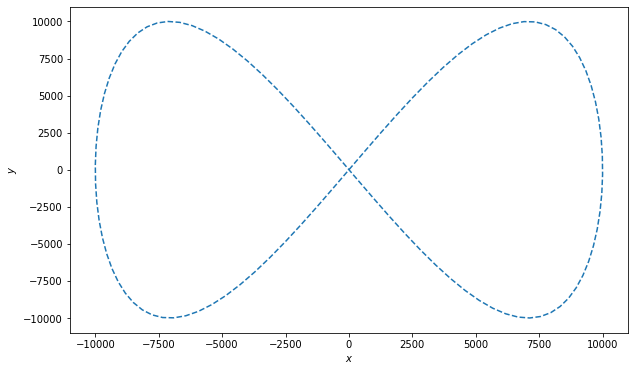

In [18]:
# Figure to plot truth (and future data)
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(10, 6))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

from stonesoup.types.groundtruth import GroundTruthPath, GroundTruthState

truth = GroundTruthPath()
start_time = datetime.now()

test = np.linspace(0, (2 * np.pi )/ omega, 100, endpoint = True)

for t in test:
    x = A * np.sin(omega * t)
    y = A * np.sin(2 * omega * t)
    covarianz = np.array([[0.05, 0],[0, 0.05]])
    xy = np.random.multivariate_normal(np.array([x,y]), covarianz)
    truth.append(GroundTruthState(np.array([[xy[0]], [xy[1]]]), timestamp=start_time+timedelta(seconds=t)))

ax.plot([state.state_vector[0, 0] for state in truth], 
        [state.state_vector[1, 0] for state in truth], 
        linestyle="--")
